# WEB SCRAPING PROJECT

#### In this project we will see:

1) Which Libraries we need to use
2) How to get data from multiple web pages
3) How to find and import value tags
4) Create Dataframe with values
5) We'll answer at some questions

In [15]:
# All libraries we'll need
from bs4 import BeautifulSoup as soup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
# Set up the URL
url = 'https://www.glassdoor.it/Lavoro/italia-data-science-lavori-SRCH_IL.0,6_IN120_KO7,19.htm?includeNoSalaryJobs=true'
def get_soup(url):
    html = requests.get(url)
    return soup(html.content, 'lxml')

In [102]:
# Get the values we want
url_list = []
companyName = []
jobTitle = []
location = []
posted = []

for i in range(1,50):
    url = f'https://wuzzuf.net/search/jobs/?a=hpb&q=&start=+{str(i)}'
    bsobj = get_soup(url)
    #print('===================== Page {} ===================== '.format(i))
    
    for company in bsobj.find_all('a', {'class':'css-17s97q8'}):
        companyName.append(company.get_text())

    for job in bsobj.find_all('h2', {'class':'css-m604qf'}):
        jobTitle.append(job.get_text())

    for loc in bsobj.find_all('span', {'class':'css-5wys0k'}):
        location.append(loc.get_text())

    for time in bsobj.find_all('div', {'class':'css-4c4ojb'}):
        if time.get_text() == '':
            posted.append('not specified')
        else:
            posted.append(time.get_text())

In [103]:
# Create a dataframe
df = pd.DataFrame({'Company Name':companyName, 'Job Title':jobTitle, 'Location':location, 'Posted':posted})
df

,Company Name,Job Title,Location,Posted
0,Majorel Egypt -,Medical Company Call Center Agents .,"Katameya, Cairo, Egypt",1 hour ago
1,Creator -,Search Engine Optimization Specialist,"Sheikh Zayed, Giza, Egypt",2 hours ago
2,The Address Investments for Real Estate Consul...,Training Officer (REAL ESTATE),"New Cairo, Cairo, Egypt",2 hours ago
3,Confidential -,Senior HR Manager,"Mokattam, Cairo, Egypt",2 hours ago
4,Majorel Egypt -,English Back Office Agent. (Airlines Company)..,"Katameya, Cairo, Egypt",2 hours ago
...,...,...,...,...
730,Alaa El din insurance -,Credit Officer مسئول الائتمان,"Cairo, Egypt",5 days ago
731,Perfect Presentation -,Mobile Application Development Team Lead,"6th of October, Giza, Egypt",5 days ago
732,Tabarak Holding -,Executive Manager - ( Residential Compound ),"New Cairo, Cairo, Egypt",5 days ago
733,Firoz Group -,Senior Technical Office Engineer ( Mechanical ),"Nasr City, Cairo, Egypt",5 days ago


In [126]:
# Check if there are any duplicate values
print(f'There are {df.duplicated().sum()} duplicate values')

There are 0 duplicate values


In [131]:
# Check if there are any null values
print('There are {} null values'.format(df.isnull().sum().sum()))
df.isnull().sum()

There are 0 null values


Company Name    0
Job Title       0
Location        0
Posted          0
dtype: int64

## Best 10 cities for search a job

In [107]:
df['Location'].value_counts()

Cairo, Egypt                      122
Maadi, Cairo, Egypt                93
New Cairo, Cairo, Egypt            81
6th of October, Giza, Egypt        58
Nasr City, Cairo, Egypt            48
                                 ... 
Dubai, United Arab Emirates         1
Ras Albar, Damietta, Egypt          1
Berlin, Germany                     1
Tabuk, Saudi Arabia                 1
Wadi Alnatrun, Beheira, Egypt       1
Name: Location, Length: 74, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Location'>

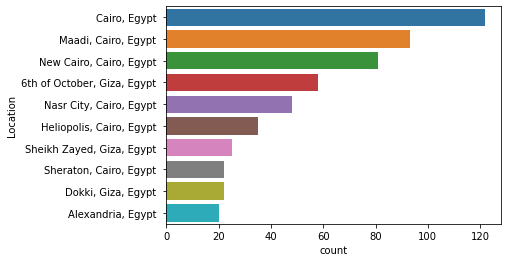

In [108]:
sns.countplot(y='Location', data=df, order=df['Location'].value_counts().iloc[:10].index)

# Best 10 companies where search a job

<AxesSubplot:xlabel='count', ylabel='Company Name'>

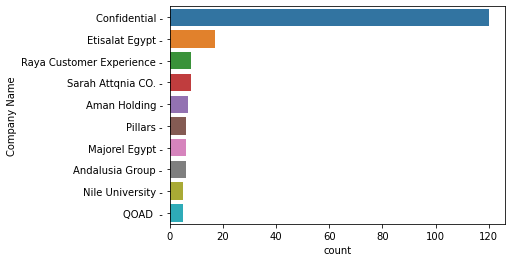

In [109]:
sns.countplot(y='Company Name', data=df, order=df['Company Name'].value_counts().iloc[:10].index)

# Best 10 job

<AxesSubplot:xlabel='count', ylabel='Job Title'>

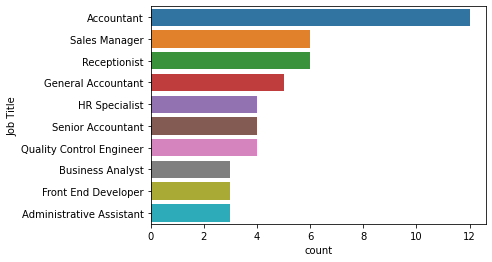

In [110]:
sns.countplot(y='Job Title', data=df, order=df['Job Title'].value_counts().iloc[:10].index)

# How many job contain the 'data' keyword into job title?

In [111]:
df[df['Job Title'].str.contains('Data')].head()

,Company Name,Job Title,Location,Posted
27,Botit -,Data Entry Specialist,"Abdeen, Cairo, Egypt",4 hours ago
88,Confidential -,Data Archiving Specialist,"Cairo, Egypt",6 hours ago
561,QOAD -,Senior Database Developer,"Sheraton, Cairo, Egypt",4 days ago
584,Centro CDX -,Senior Data Architect,"Cairo, Egypt",4 days ago
606,The International School of Elite Education -,Data Analyst,"New Cairo, Cairo, Egypt",4 days ago


In [112]:
data = len(df[df['Job Title'].str.contains('Data')])
print(f'Has been found {data} jobs related to Data')

Has been found 5 jobs related to Data


# How many job contain the 'Designer' keyword into job title?

In [113]:
df[df['Job Title'].str.contains('Designer')].head()

,Company Name,Job Title,Location,Posted
21,Deli Techno -,Senior Graphic Designer,"Alexandria, Egypt",4 hours ago
48,"British International School, Cairo -",Graphic Designer,"Sheikh Zayed, Giza, Egypt",5 hours ago
56,Sarah Attqnia CO. -,Mechanical Designer - رسام ميكانيك,"Riyadh, Saudi Arabia",5 hours ago
59,Sarah Attqnia CO. -,Architecture Designer - رسام معمارى,"Riyadh, Saudi Arabia",5 hours ago
107,Harmony -,Industrial Designer,"6th of October, Giza, Egypt",7 hours ago


In [114]:
Designer = len(df[df['Job Title'].str.contains('Designer')])
print(f'Has been found {Designer} jobs related to Designer')

Has been found 12 jobs related to Designer


# How many job contain the 'Frontend' keyword into job title?

In [115]:
df[df['Job Title'].str.contains('Frontend')].head()

,Company Name,Job Title,Location,Posted
7,Arabian Systems -,Frontend Team Lead,"New Cairo, Cairo, Egypt",2 hours ago
114,ATI Systems -,Angular Frontend Developer,"Mohandessin, Giza, Egypt",7 hours ago
697,FORALL - -,Web Frontend Developer,"Cairo, Egypt",5 days ago


In [116]:
Frontend = len(df[df['Job Title'].str.contains('Frontend')])
print(f'Has been found {Frontend} jobs related to Frontend')

Has been found 3 jobs related to Frontend


# How many job contain the 'Backend' keyword into job title?

In [117]:
df[df['Job Title'].str.contains('Backend')].head()

,Company Name,Job Title,Location,Posted
8,The Address Investments for Real Estate Consul...,Senior Backend Developer,"Cairo, Egypt",2 hours ago
83,Nadeer -,Backend Developer Node.js,"Nasr City, Cairo, Egypt",6 hours ago
92,Nile University -,Backend Developer,"Sheikh Zayed, Giza, Egypt",6 hours ago
189,Confidential -,Senior Backend Developer (.NET Core),"Nasr City, Cairo, Egypt",18 hours ago
608,Nugttah -,Backend Development Lead,"Cairo, Egypt",4 days ago


In [118]:
beckend = len(df[df['Job Title'].str.contains('Backend')])
print(f'Has been found {beckend} jobs related to Backend')

Has been found 7 jobs related to Backend


# Export file into xlsx format

In [119]:
df.to_excel('jobs_search.xlsx', index=False)